<a href="https://colab.research.google.com/github/peasant87/iesb-deep-learning/blob/master/Nao_supervisionada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho - Não Supervisionada

## Aquecendo os motores

In [0]:
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os 
import warnings

warnings.filterwarnings('ignore')

In [2]:
#importar biblioteca do colab
#montar pasta do drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#importar CSV
docs_path = '/content/drive/My Drive/Colab Notebooks/Trabalho - Não Supervisionada/'
df = pd.read_csv(docs_path+'site_data_2018.csv', encoding='utf-16',sep=',')

In [4]:
#Verificar topo da tabela e importação dos dados
df.head()

,Date,Unique visitors,Visits,Users,Actions,Maximum actions in one visit,Bounces,Total time spent by visitors (in seconds),Returning Visits,Actions by Returning Visits,Unique returning visitors,Returning Users,Maximum actions in one returning visit,Bounce Rate for Returning Visits,Avg. Actions per Returning Visit,Avg. Duration of a Returning Visit (in sec),Conversions,Visits with Conversions,Revenue,Conversion Rate,nb_conversions_new_visit,nb_visits_converted_new_visit,revenue_new_visit,conversion_rate_new_visit,nb_conversions_returning_visit,nb_visits_converted_returning_visit,revenue_returning_visit,conversion_rate_returning_visit,Bounce Rate,Actions per Visit,Avg. Visit Duration (in seconds),Pageviews,Unique Pageviews,Downloads,Unique Downloads,Outlinks,Unique Outlinks,Searches,Unique Keywords,nb_hits_with_time_generation,Avg. generation time
0,2018-01-01,141074,163891,141022,2307412,329,737,66904752,138693,1936478,119053,119035,329,0%,14.0,6 min 48s,0,0,0,0%,0,0,0,0%,0,0,0,0%,0%,14.1,6 min 48s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,625527,893245,625288,13371197,2066,6165,425612104,776792,11511012,540456,540354,2066,1%,14.8,7 min 56s,0,0,0,0%,0,0,0,0%,0,0,0,0%,1%,15.0,7 min 56s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,574937,787104,574677,10948993,427,6715,337911048,690612,9485782,500884,500794,421,1%,13.7,7 min 7s,0,0,0,0%,0,0,0,0%,0,0,0,0%,1%,13.9,7 min 9s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-04,543305,736348,543041,9905994,698,8237,300841148,647272,8578668,474951,474843,698,1%,13.3,6 min 45s,0,0,0,0%,0,0,0,0%,0,0,0,0%,1%,13.5,6 min 49s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-05,562113,776235,561841,10549546,803,7890,323653987,684719,9181620,493022,492920,803,1%,13.4,6 min 54s,0,0,0,0%,0,0,0,0%,0,0,0,0%,1%,13.6,6 min 57s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Verificar estrutura do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 41 columns):
Date                                           361 non-null object
Unique visitors                                361 non-null int64
Visits                                         361 non-null int64
Users                                          361 non-null int64
Actions                                        361 non-null int64
Maximum actions in one visit                   361 non-null int64
Bounces                                        361 non-null int64
Total time spent by visitors (in seconds)      361 non-null int64
Returning Visits                               361 non-null int64
Actions by Returning Visits                    361 non-null int64
Unique returning visitors                      361 non-null int64
Returning Users                                361 non-null int64
Maximum actions in one returning visit         361 non-null int64
Bounce Rate for Returning Visits    

In [0]:
#deletar dados não utilizados
colunas_deletadas = ['Avg. Duration of a Returning Visit (in sec)', 'Conversions',
       'Visits with Conversions', 'Revenue', 'Conversion Rate',
       'nb_conversions_new_visit', 'nb_visits_converted_new_visit',
       'revenue_new_visit', 'conversion_rate_new_visit',
       'nb_conversions_returning_visit', 'nb_visits_converted_returning_visit',
       'revenue_returning_visit', 'conversion_rate_returning_visit',
       'Bounce Rate', 'Actions per Visit', 'Avg. Visit Duration (in seconds)',
       'Pageviews', 'Unique Pageviews', 'Downloads', 'Unique Downloads',
       'Outlinks', 'Unique Outlinks', 'Searches', 'Unique Keywords',
       'nb_hits_with_time_generation', 'Avg. generation time',
       'Bounce Rate for Returning Visits']
df = df.drop(labels=colunas_deletadas, axis=1)


In [7]:
#separar coluna Date em dia e mes
date = df.Date.astype(str)
date = date.str.split('-',expand=True)
df['Month'] = date[1]
df['Day'] = date[2]
df.Day = df.Day.astype(int)
df.Month = df.Month.astype(int)

# corrigir tipo da coluna 'Date'
df.Date = pd.to_datetime(df.Date)
df.Date = df.Date.astype(int)

df.head()

,Date,Unique visitors,Visits,Users,Actions,Maximum actions in one visit,Bounces,Total time spent by visitors (in seconds),Returning Visits,Actions by Returning Visits,Unique returning visitors,Returning Users,Maximum actions in one returning visit,Avg. Actions per Returning Visit,Month,Day
0,1514764800000000000,141074,163891,141022,2307412,329,737,66904752,138693,1936478,119053,119035,329,14.0,1,1
1,1514851200000000000,625527,893245,625288,13371197,2066,6165,425612104,776792,11511012,540456,540354,2066,14.8,1,2
2,1514937600000000000,574937,787104,574677,10948993,427,6715,337911048,690612,9485782,500884,500794,421,13.7,1,3
3,1515024000000000000,543305,736348,543041,9905994,698,8237,300841148,647272,8578668,474951,474843,698,13.3,1,4
4,1515110400000000000,562113,776235,561841,10549546,803,7890,323653987,684719,9181620,493022,492920,803,13.4,1,5


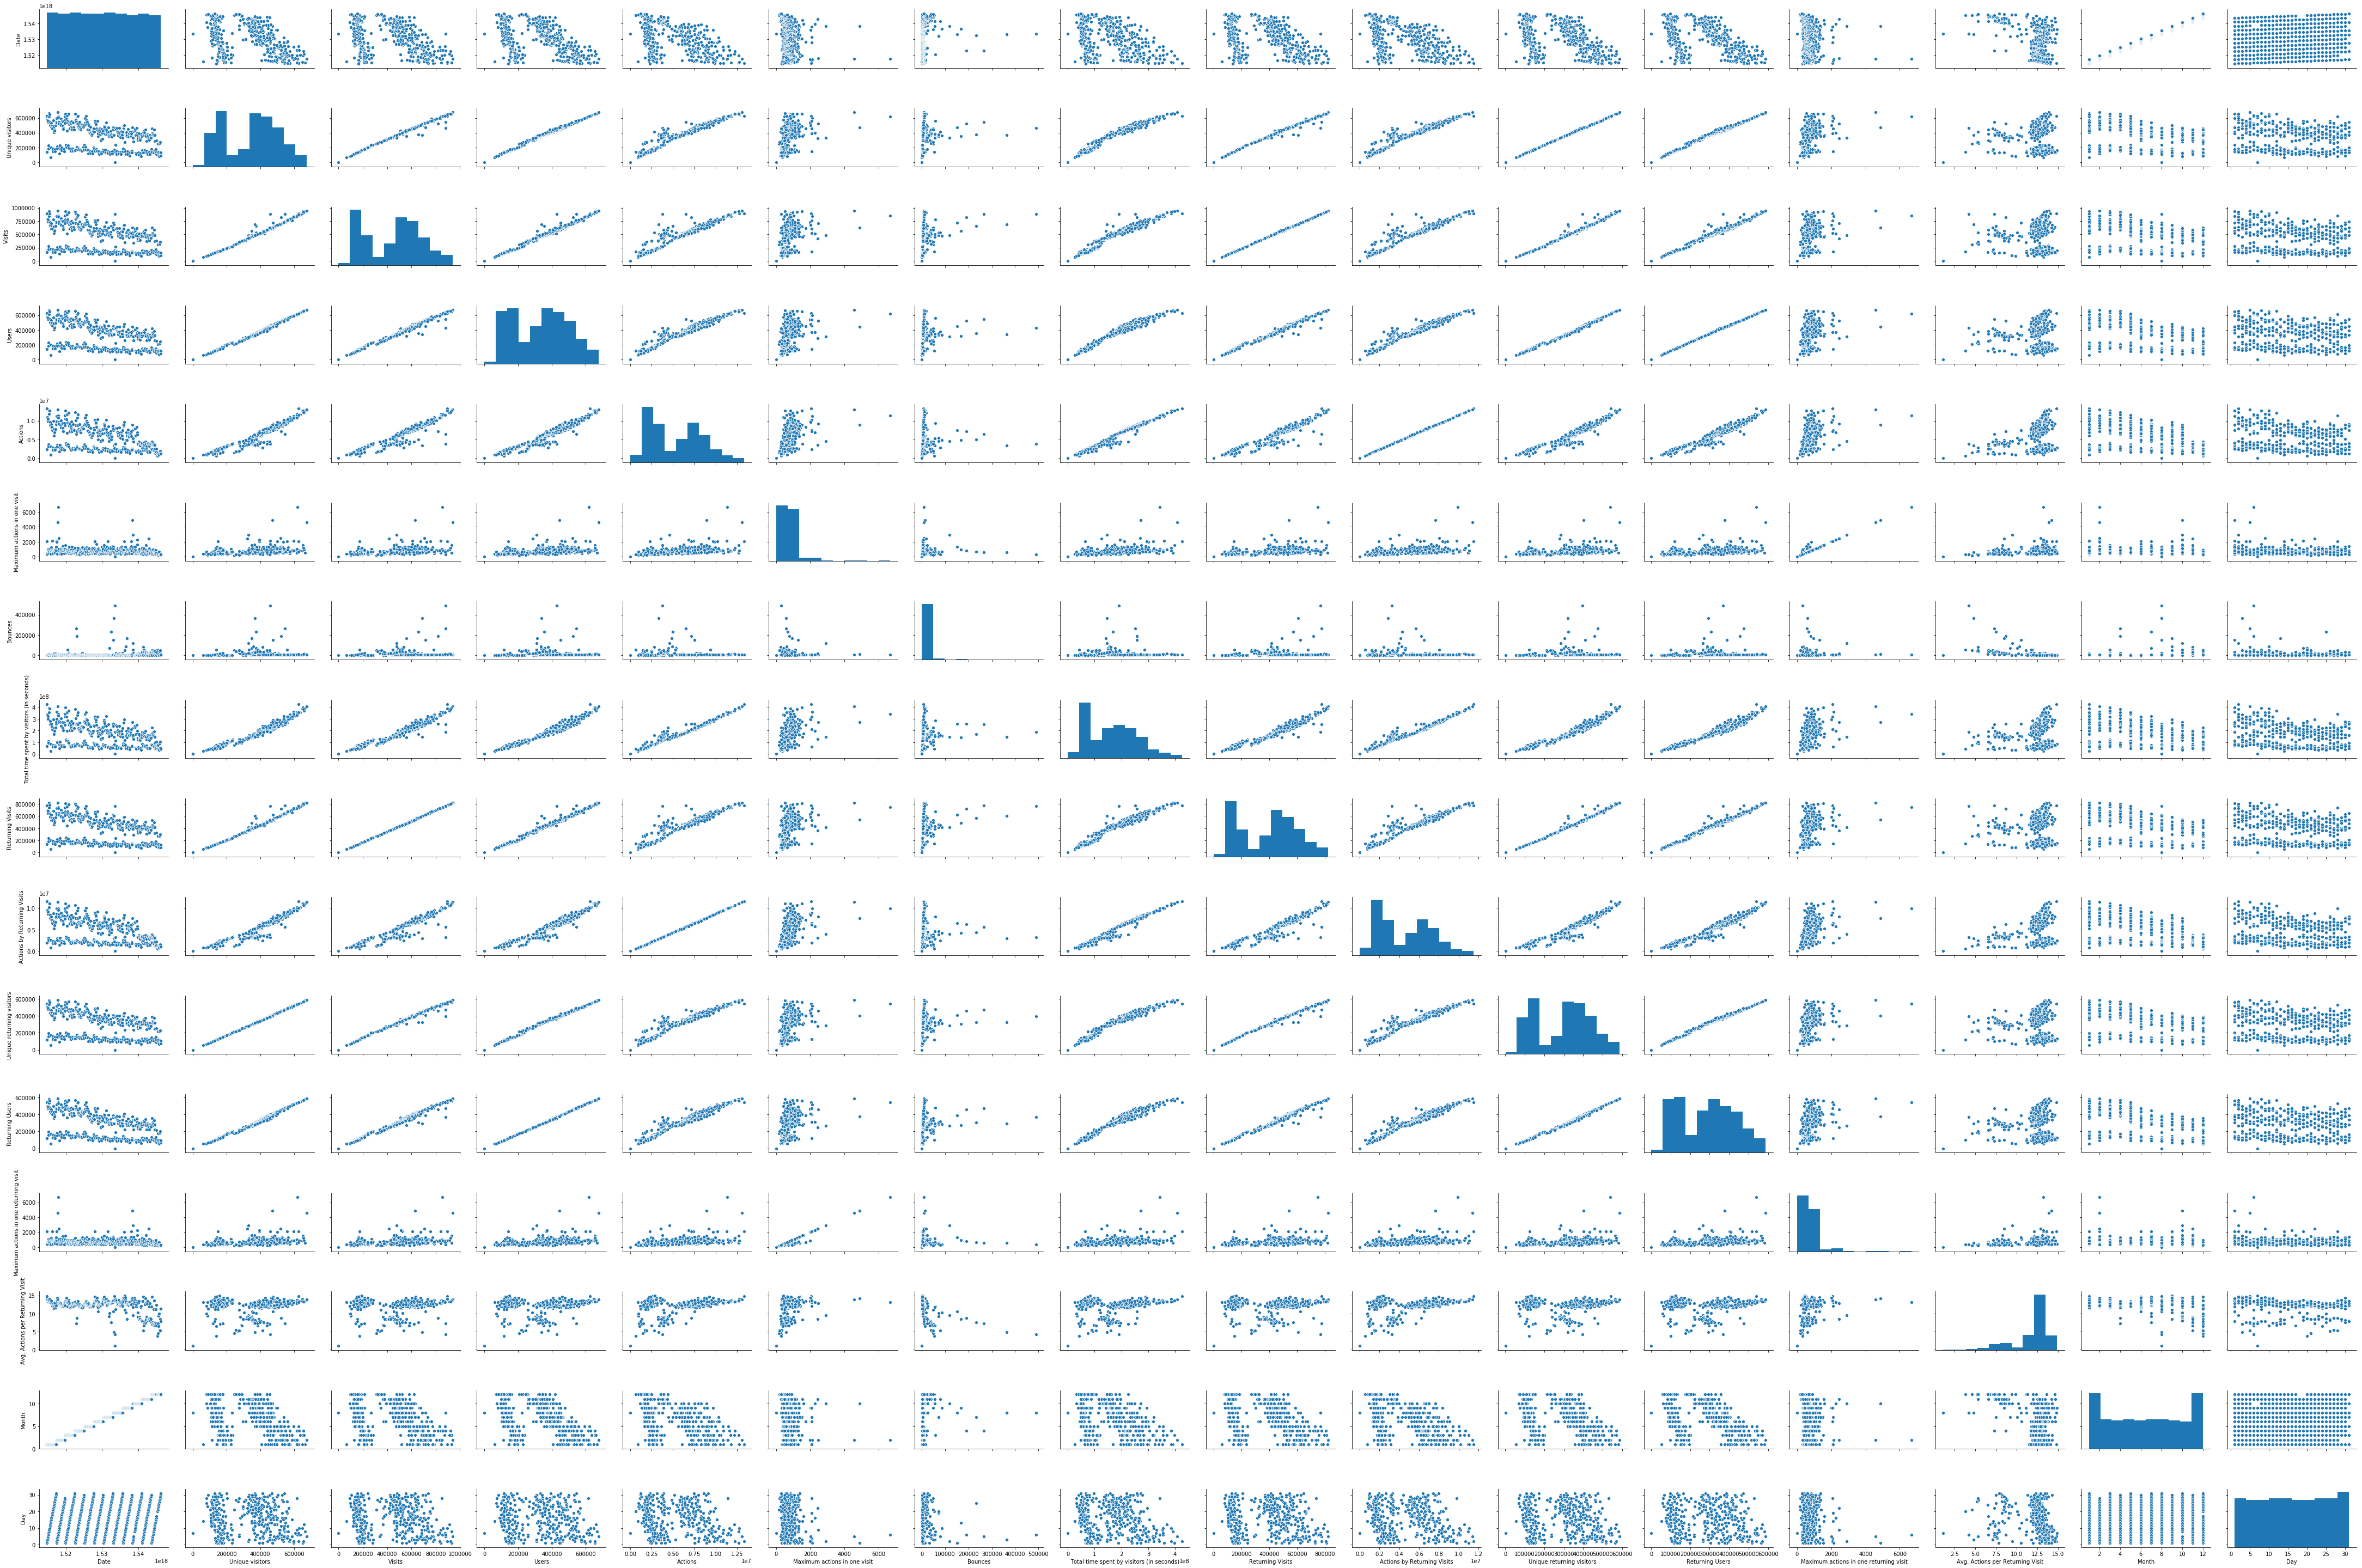

In [8]:
sns.pairplot(data=df, aspect=1.5)
plt.show()

## KMeans

In [0]:
X = df.drop(['Date'], axis=1)

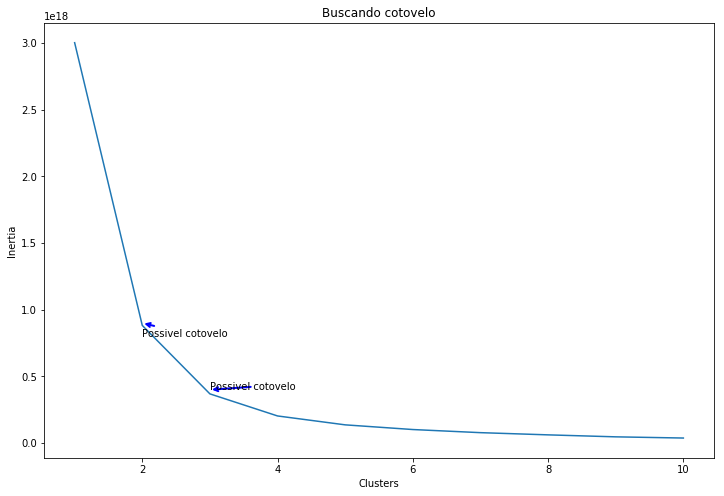

In [10]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Buscando cotovelo')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possivel cotovelo', xy=(2, 0.9e18), xytext=(2,0.8e18), 
            xycoords='data', arrowprops=dict(arrowstyle='->', 
                                             connectionstyle='arc3', 
                                             color='blue', lw=2))

ax.annotate('Possivel cotovelo', xy=(3, 0.4e18), xytext=(3, 0.4e18), 
            xycoords='data', arrowprops=dict(arrowstyle='->', 
                                             connectionstyle='arc3', 
                                             color='blue', lw=2))

plt.show()

### Por que buscar o cotovelo?
Utilizamos o método do cotovelo para decidir quantos clusters devem ser criados utilizando K-means. Quando ocorre uma significativa mudança na inércia, é o ponto que nos indica uma possível quantidade ideal de clusters.

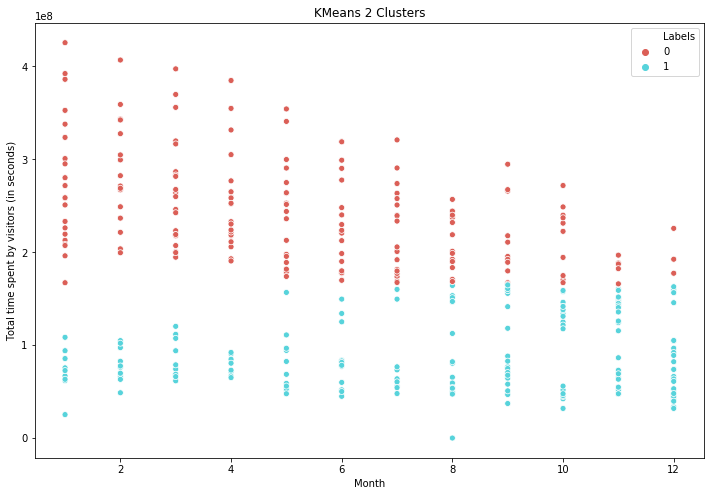

In [11]:
km2 = KMeans(n_clusters=2).fit(X)

X['Labels'] = km2.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X['Month'],X['Total time spent by visitors (in seconds)'],hue=X['Labels'],
               palette=sns.color_palette('hls',2))
plt.title('KMeans 2 Clusters')
plt.show()

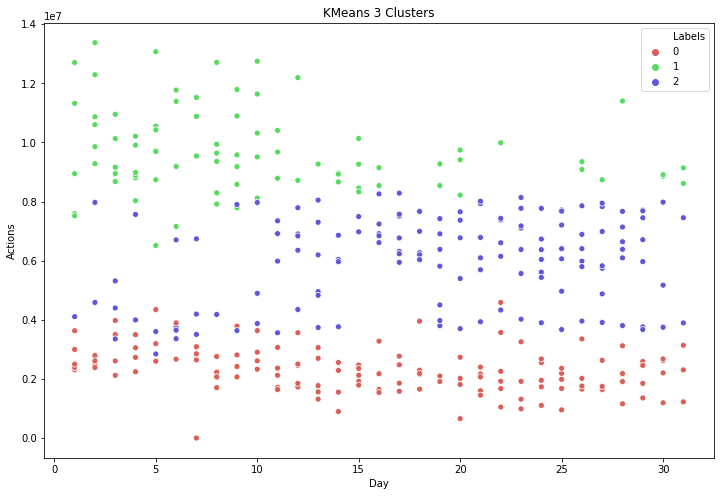

In [12]:
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X['Day'],X['Actions'],hue=X['Labels'],
               palette=sns.color_palette('hls',3))
plt.title('KMeans 3 Clusters')
plt.show()

Como nos mostram ambos os gráficos acima, tanto com dois quanto com três clusters, que há uma clara queda no uso deste website ao longo dos meses, perdendo boa parte de sua atratividade inicial. O mesmo é verdade, também, dentro dos dias dos meses, havendo um movimento muito maior nos primeiros dias do mês.

## PCA

In [0]:
from sklearn.decomposition import PCA as sklearnPCA
X = X.drop(columns=['Labels'])

In [14]:
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

NameError: ignored

In [0]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=Y_sklearn,
               palette=sns.color_palette('hls',2))
plt.title('PCA')
plt.show()

Como se pode observar o PCA nos mostra uma divisão, aproximada, das características capazes de aglomerar os dados em dois clusters. Há um conjunto de dados mais centralizado, e outro mais disperso ao longo do gráfico.